In [64]:
import pandas as pd

dataset = pd.read_csv('heart_2020_cleaned.csv')
dataset.head()

# number of data in the dataset
print("Number of data in the dataset: ", len(dataset.index))
print(dataset.shape[0])

Number of data in the dataset:  319795
319795


In [65]:
if dataset.duplicated().any():      # checking for duplicate data
    dataset.drop_duplicates(inplace=True)       # removing the duplicates
    print("Number of data after removing duplicates: ", dataset.shape[0])
else: 
    print("No duplicates")

Number of data after removing duplicates:  301717


In [66]:
if dataset.isnull().values.any():    # checking for null data
    print(dataset.isnull().sum())
    dataset.dropna()        # removing the null values
    print("Number of data after removing null values: ", dataset.shape[0])
else:
    print("No null values")

No null values


In [67]:
no_of_target_data = dataset['HeartDisease'].value_counts()      # checking the number of 'yes' and 'no' in the label
print(no_of_target_data)

No     274456
Yes     27261
Name: HeartDisease, dtype: int64


In [68]:
# We haven't encoded BMI, sleeptime, MentalHealth and PhysicalHealth
# They are already integers and floats

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(dataset['HeartDisease'])
dataset['HeartDisease']=label_encoder.transform(dataset['HeartDisease'])

label_encoder.fit(dataset['Smoking'])
dataset['Smoking']=label_encoder.transform(dataset['Smoking'])

label_encoder.fit(dataset['AlcoholDrinking'])
dataset['AlcoholDrinking']=label_encoder.transform(dataset['AlcoholDrinking'])

label_encoder.fit(dataset['Stroke'])
dataset['Stroke']=label_encoder.transform(dataset['Stroke'])

label_encoder.fit(dataset['DiffWalking'])
dataset['DiffWalking']=label_encoder.transform(dataset['DiffWalking'])

label_encoder.fit(dataset['Sex'])
dataset['Sex']=label_encoder.transform(dataset['Sex'])

label_encoder.fit(dataset['AgeCategory'])
dataset['AgeCategory']=label_encoder.transform(dataset['AgeCategory'])

label_encoder.fit(dataset['Race'])
dataset['Race']=label_encoder.transform(dataset['Race'])

label_encoder.fit(dataset['Diabetic'])
dataset['Diabetic']=label_encoder.transform(dataset['Diabetic'])

label_encoder.fit(dataset['PhysicalActivity'])
dataset['PhysicalActivity']=label_encoder.transform(dataset['PhysicalActivity'])

label_encoder.fit(dataset['GenHealth'])
dataset['GenHealth']=label_encoder.transform(dataset['GenHealth'])

label_encoder.fit(dataset['Asthma'])
dataset['Asthma']=label_encoder.transform(dataset['Asthma'])

label_encoder.fit(dataset['KidneyDisease'])
dataset['KidneyDisease']=label_encoder.transform(dataset['KidneyDisease'])

label_encoder.fit(dataset['SkinCancer'])
dataset['SkinCancer']=label_encoder.transform(dataset['SkinCancer'])

In [69]:
print("Dataset after encoding the labels")
dataset.head()

Dataset after encoding the labels


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


<Axes: >

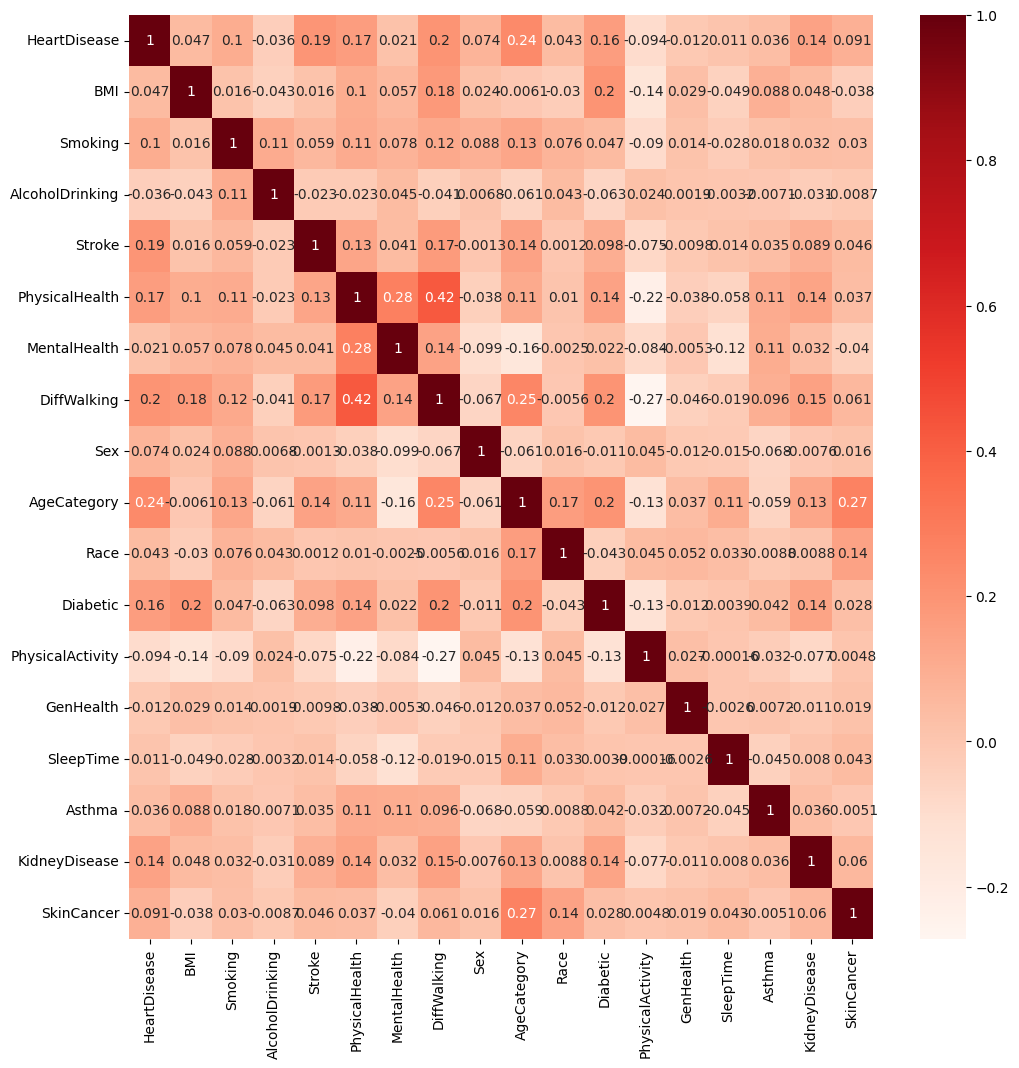

In [70]:
from matplotlib import pyplot as plt
import seaborn as sns

# Correlation matrix
plt.figure(figsize= (12,12))
sns.heatmap(dataset.corr(),annot = True,cmap='Reds')

In [72]:
# defining features and label
x = dataset.drop(["HeartDisease"], axis = 1).values     # feature
y = dataset["HeartDisease"].values      # label

Implementing RandomForest without handling imbalanced data

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

print("Total number of data: ", x.shape[0])
print("Total number of train data: ", x_train.shape[0])
print("Total number of test data: ", x_test.shape[0])

Total number of data:  301717
Total number of train data:  241373
Total number of test data:  60344


In [74]:
# data scaling
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

x_train = robust_scaler.fit_transform(x_train)
x_test = robust_scaler.fit_transform(x_test)

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
# d_tree = tree.DecisionTreeClassifier()
# d_tree_param = {"criterion": ['gini', 'entropy'],
#                 "max_depth": range(3,10),
#                 "min_samples_split": range(1,8),
#                 "min_samples_leaf": range(1,5)
#                 }
# d_tree_grid_search = GridSearchCV(estimator=d_tree, param_grid=d_tree_param, cv = 5)
# d_tree_grid_search.fit(x_train, y_train)
# best_params = d_tree_grid_search.best_params_
# print(best_params)

In [77]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
d_tree1 = tree.DecisionTreeClassifier()
d_tree1.fit(x_train, y_train)
d_tree_pred = d_tree1.predict(x_test)

accuracy = accuracy_score(y_test, d_tree_pred)
print("Accuracy: ", accuracy*100, "%")

Accuracy:  85.17002518891688 %


In [62]:
# Hyperparameter finetuning using GridSearchCV

# classifier = RandomForestClassifier()

# param_grid = {'n_estimators': [50, 75, 100, 125], 
#               'max_depth': [5, 6, 7, 8, 9, 10], 
#               'max_features': [5, 6, 7, 8]}

# grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, cv = 3) 
# grid_search.fit(x_train, y_train)

# best_parameters = grid_search.best_params_
# print("Best Hyperparameters: ", best_parameters)

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# classifier1 = RandomForestClassifier(n_estimators=best_parameters['n_estimators'], 
#                                      max_depth = best_parameters['max_depth'], 
#                                      max_features = best_parameters['max_features'])

# classifier1 = RandomForestClassifier(n_estimators=50, max_depth = 10, max_features = 5)
classifier1 = RandomForestClassifier()
classifier1.fit(x_train, y_train)
pred1 = classifier1.predict(x_test)

accuracy1 = accuracy_score(y_test, pred1)
print("Accuracy: ", accuracy1*100, "%")

print(classification_report(y_test, pred1))

Accuracy:  91.07947766140792 %
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     54894
           1       0.58      0.04      0.08      5450

    accuracy                           0.91     60344
   macro avg       0.75      0.52      0.52     60344
weighted avg       0.88      0.91      0.87     60344



XGBoost

In [80]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_classifier.fit(x_train, y_train)

xgb_pred = xgb_classifier.predict(x_test)

accuracy2 = accuracy_score(y_test, xgb_pred)
print("Accuracy: ", accuracy2*100, "%")

Accuracy:  90.96844756728092 %
